In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("data.csv")
print(data.head())
print(data["Odds"].max())

        Name FrontShoes  RearShoes  AmericanStyleCart           CoachName  \
0   Loikkaus  HAS_SHOES  HAS_SHOES              False       Henna Latvala   
1  R.R. Samu  HAS_SHOES  HAS_SHOES              False         Erkki Jämsä   
2   Ekopetus  HAS_SHOES  HAS_SHOES              False        Antti Isomaa   
3     Huuger  HAS_SHOES  HAS_SHOES              False      Satu Siikamäki   
4     Wauhti  HAS_SHOES  HAS_SHOES              False  Veli-Erkki Paavola   

           DriverName  Distance  StartTrack        Sire      StartTime  \
0      Hannu Hietanen      2100           1      Apassi  1514823300000   
1          Mika Forss      2100           2  Suikun Ero  1514823300000   
2       Ville Pohjola      2100           3    A.T. Eko  1514823300000   
3         Niko Jokela      2100           4     Viesker  1514823300000   
4  Veli-Erkki Paavola      2100           5    Valtraus  1514823300000   

   StartType  Day  Month  Year  Winner   Odds  
0  CAR_START    1      1  2018   False   7.8

In [3]:
horses = []
coaches = []
drivers = []
sires = []
for i, row in data.iterrows():
    if row["Name"] not in horses:
        horses.append(row["Name"])
    if row["DriverName"] not in drivers:
        drivers.append(row["DriverName"])
    if row["CoachName"] not in coaches:
        coaches.append(row["CoachName"])
    if (row["Sire"] not in sires):
        sires.append(row["Sire"])

In [4]:
# Used to create dataframes for columns such as DriverName from the main data
def dataframer(dataCol, rows):
    df = pd.DataFrame(0, columns=["count", "wins", "winsPerRace", "meanOdds", "oddsTotal"], index=rows)
    for i, row in data.iterrows():
        # Count amount of races
        df["count"][row[dataCol]] += 1
        # Count amount of wins
        if row["Winner"]:
            df["wins"][row[dataCol]] += 1
        #Count total odds for mean
        df["oddsTotal"][row[dataCol]] += row["Odds"]
        # Check if new minimum odd
            
    df["winsPerRace"] = df["wins"] / df["count"]
    df["meanOdds"] = df["oddsTotal"] / df["count"]
    
    return df

In [5]:
def sortAndSlice(df, col, slicer):
    sortd = df.sort_values(by=[col], ascending=False)
    sortedS = sortd[:slicer]
    return sortedS

In [6]:
def removeLowCounts(df, minCount):
    for i, row in df.iterrows():
        #print(df["count"][i])
        if (row["count"] < minCount):
            df["winsPerRace"][i] = df["winsPerRace"].mean()
            

In [7]:
siresDf = dataframer("Sire", sires)
removeLowCounts(siresDf, 5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


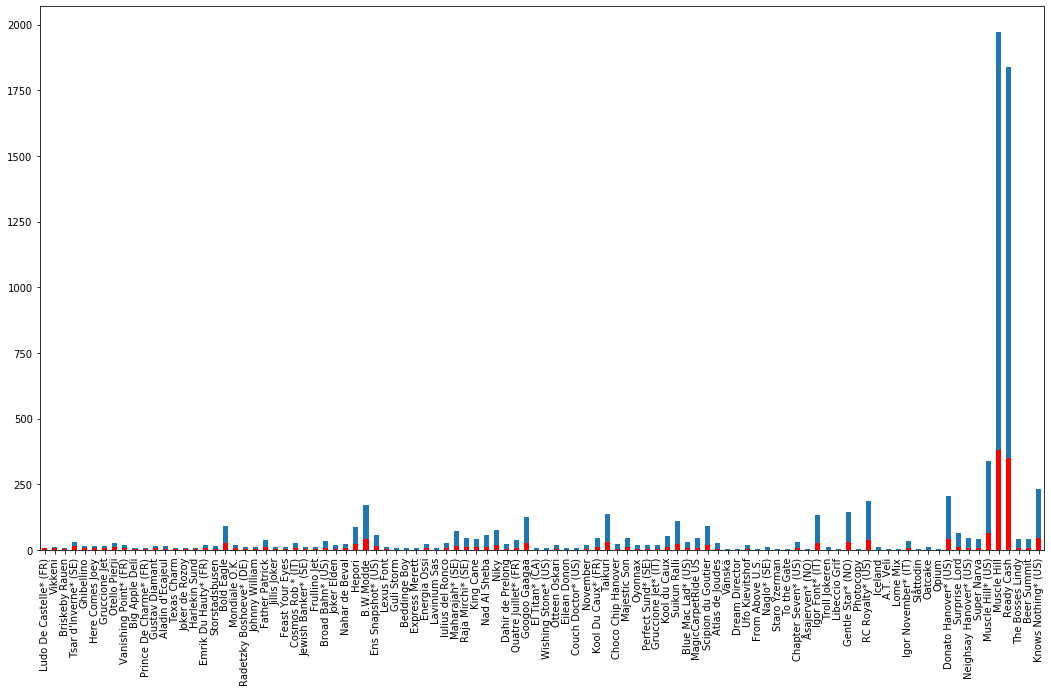

In [8]:
winRatio = sortAndSlice(siresDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")
# Top 100 best win ratio sires with the count of races and wins visualized

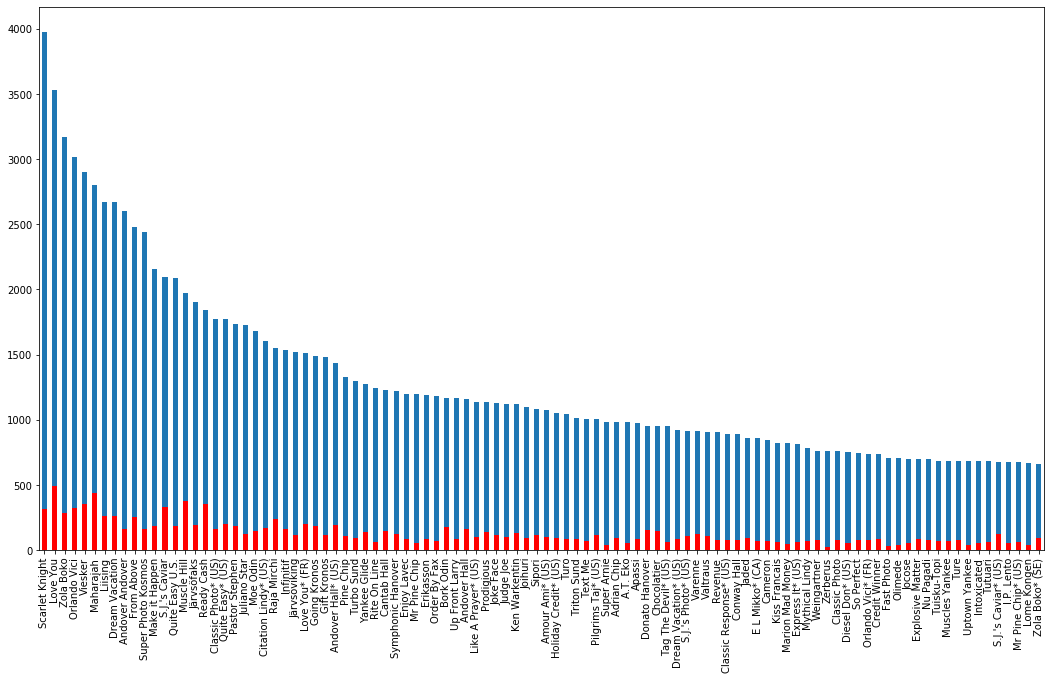

In [9]:
count = sortAndSlice(siresDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

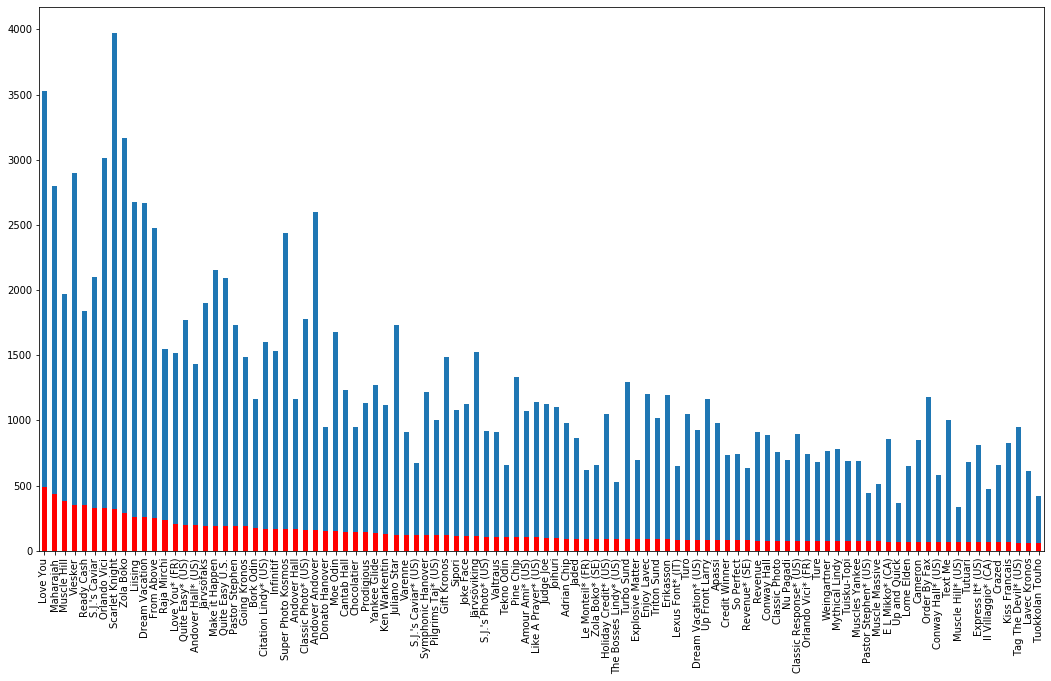

In [10]:
wins = sortAndSlice(siresDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")

In [11]:
horseDf = dataframer("Name", horses)
removeLowCounts(horseDf, 3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


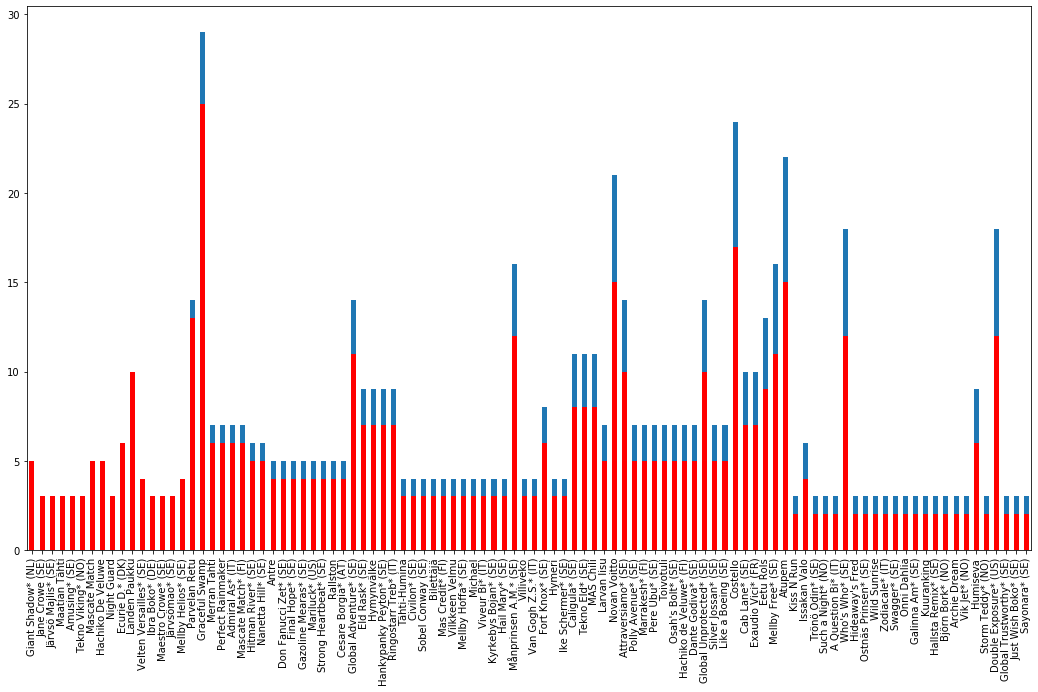

In [12]:
winRatio = sortAndSlice(horseDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")

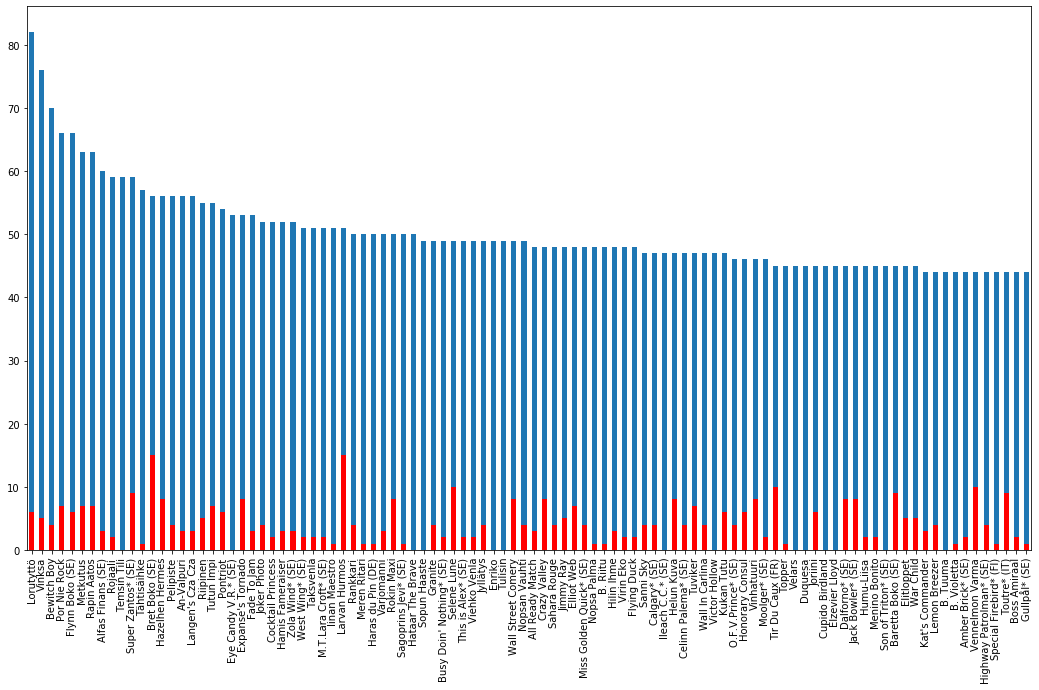

In [13]:
count = sortAndSlice(horseDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

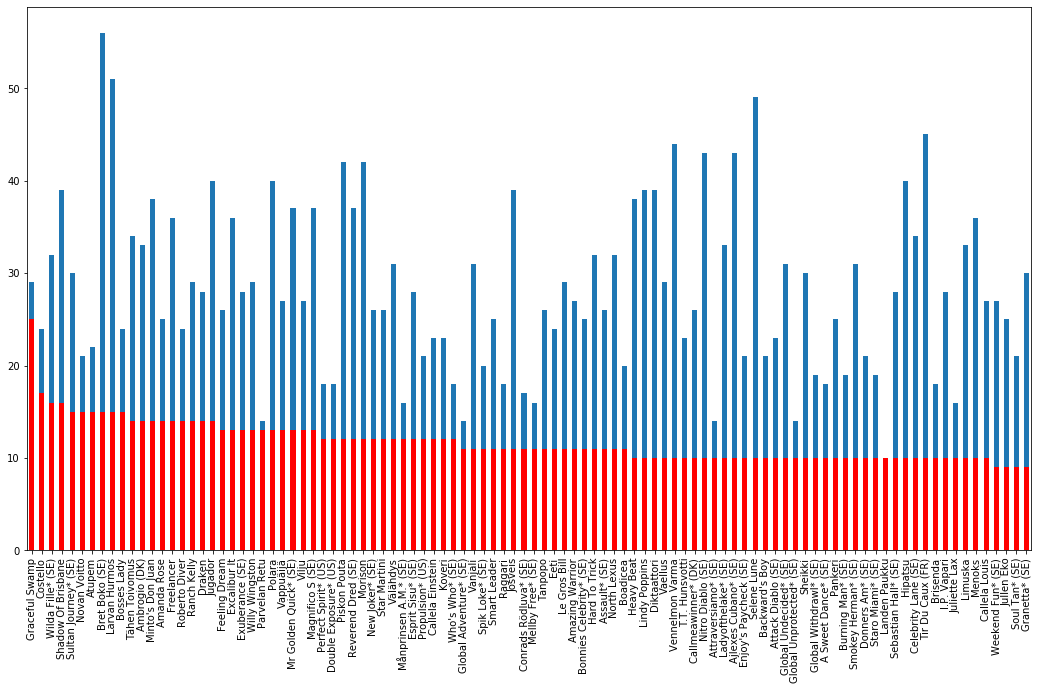

In [14]:
wins = sortAndSlice(horseDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")

In [20]:
coachDf = dataframer("CoachName", coaches)
removeLowCounts(coachDf, 10)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


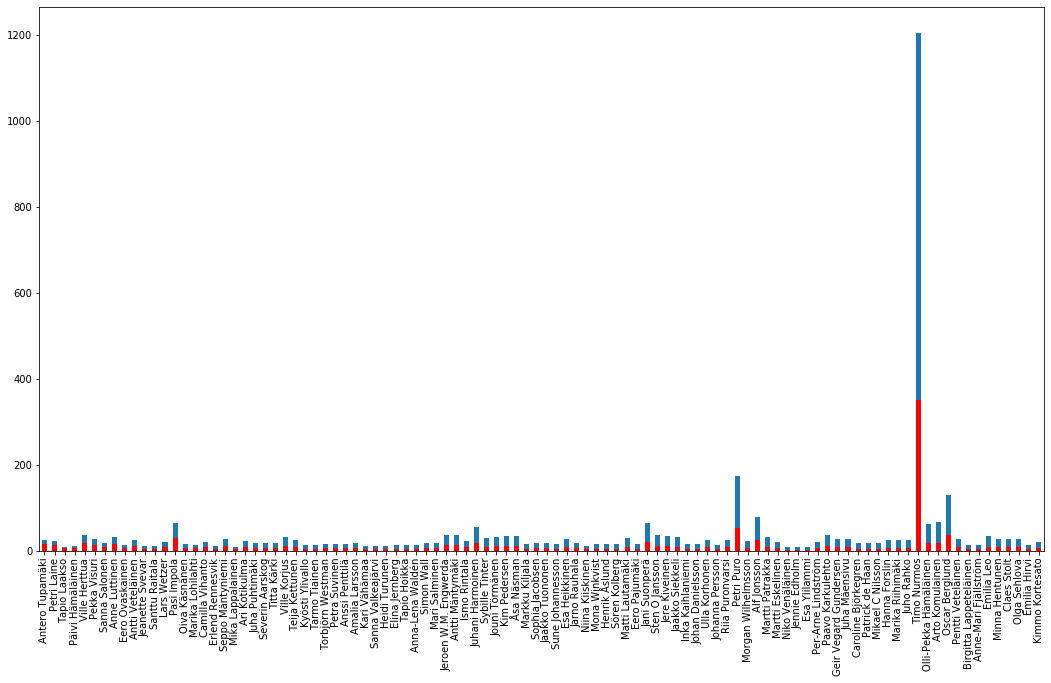

In [21]:
winRatio = sortAndSlice(coachDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")

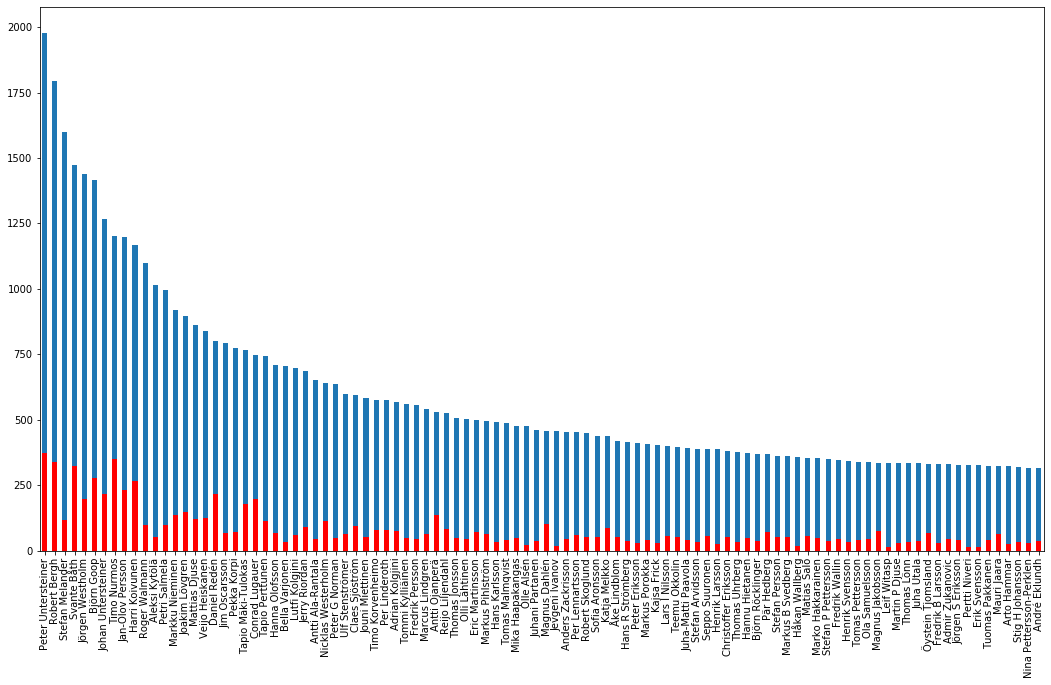

In [22]:
count = sortAndSlice(coachDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

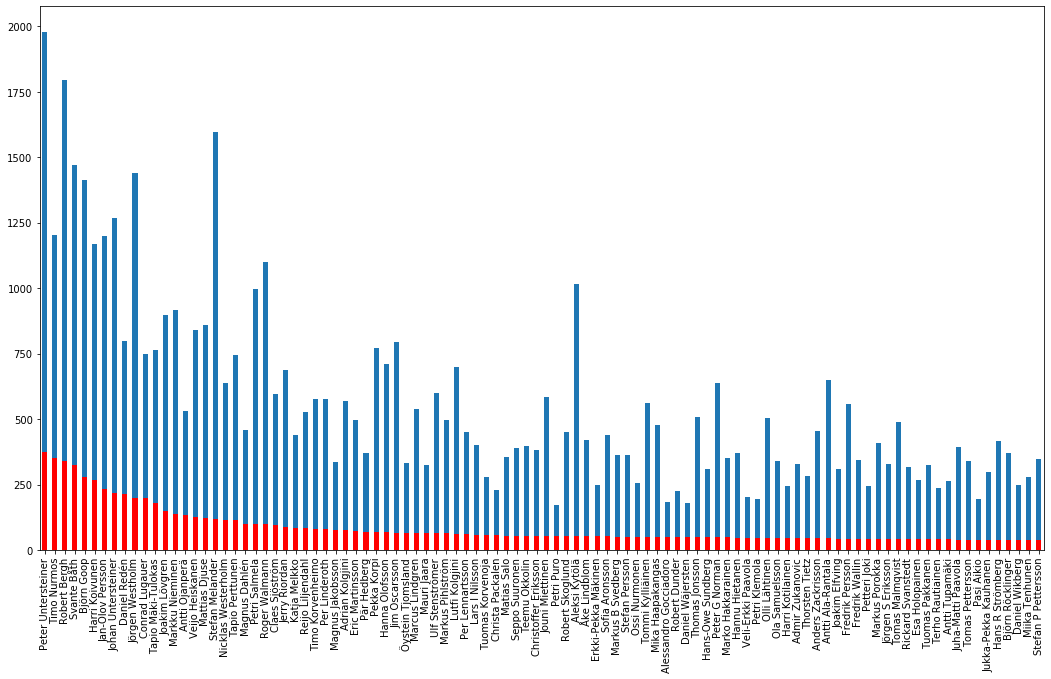

In [23]:
wins = sortAndSlice(coachDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")

In [24]:
driverDf = dataframer("DriverName", drivers)
removeLowCounts(driverDf, 15)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


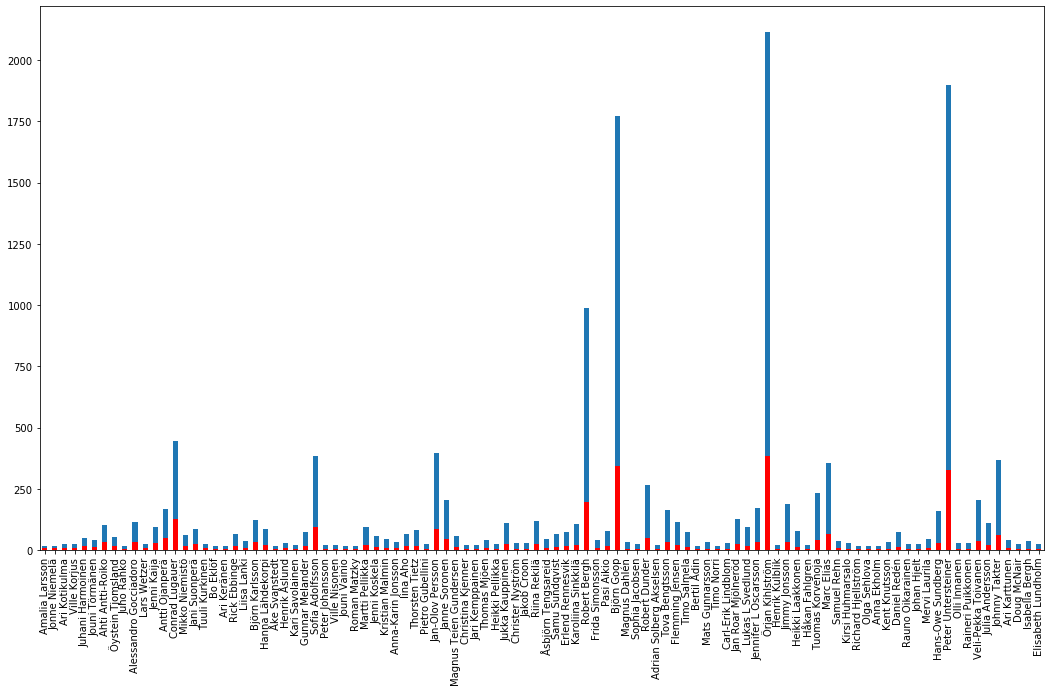

In [25]:
winRatio = sortAndSlice(driverDf, "winsPerRace", 100)
ax = winRatio["count"].plot.bar(figsize=(18,10))
winRatio["wins"].plot.bar(ax=ax, color="red")

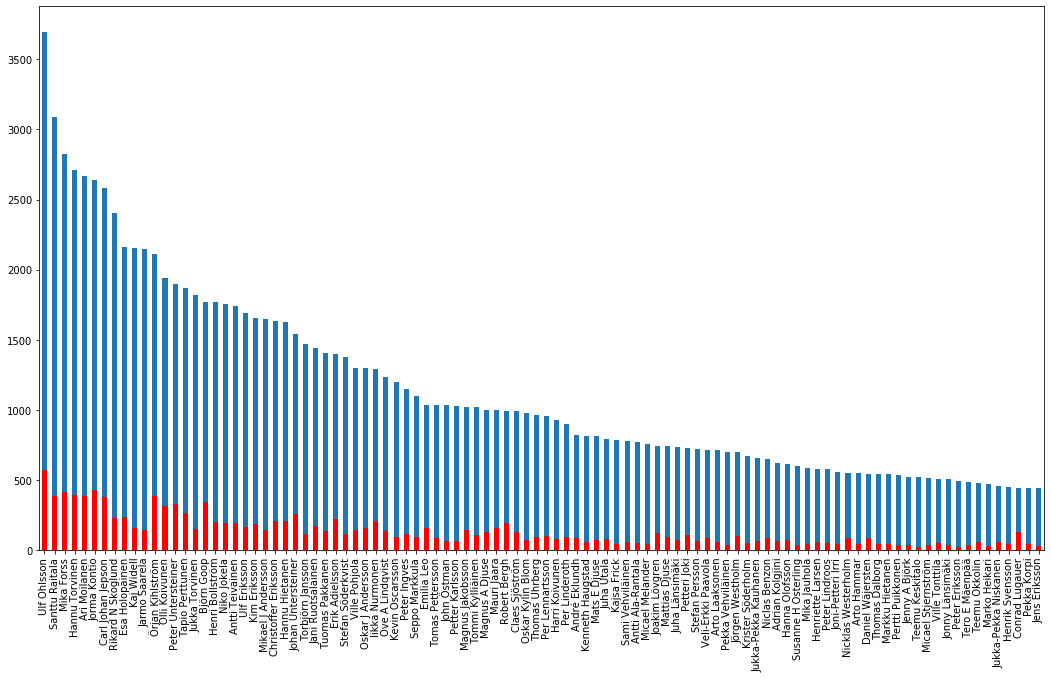

In [26]:
count = sortAndSlice(driverDf, "count", 100)
ax = count["count"].plot.bar(figsize=(18,10))
count["wins"].plot.bar(ax=ax, color="red")

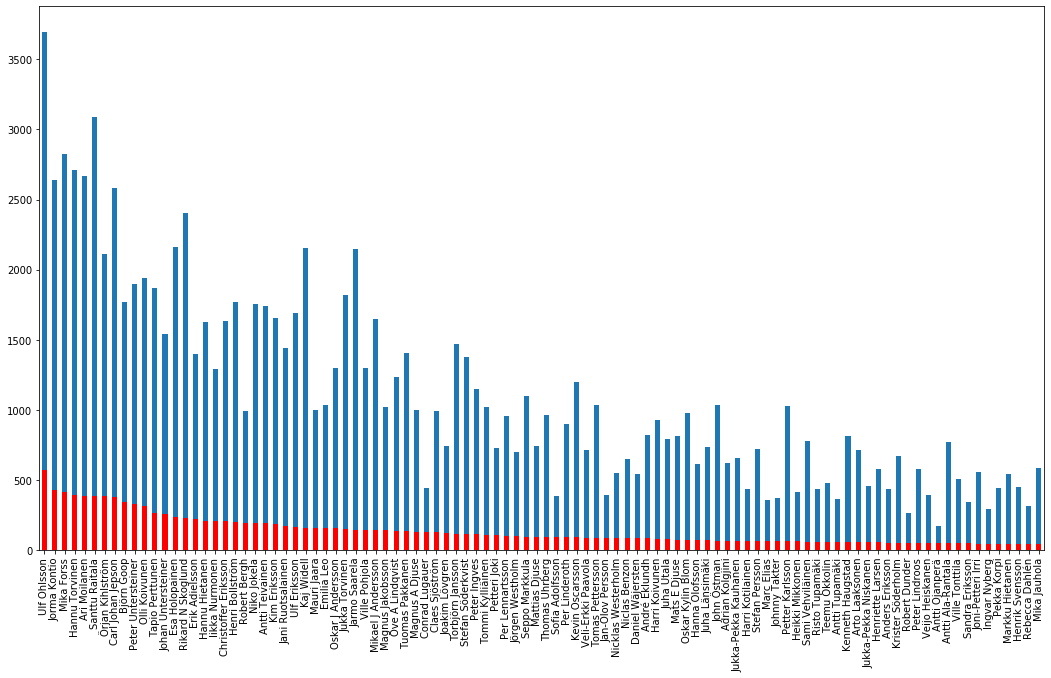

In [27]:
wins = sortAndSlice(driverDf, "wins", 100)
ax = wins["count"].plot.bar(figsize=(18,10))
wins["wins"].plot.bar(ax=ax, color="red")

In [28]:
print(driverDf.head())

                    count  wins  winsPerRace   meanOdds  oddsTotal
Hannu Hietanen       1626   209     0.128536  22.837638      37134
Mika Forss           2823   416     0.147361  15.943323      45008
Ville Pohjola        1302   144     0.110599  28.133641      36630
Niko Jokela          1752   196     0.111872  22.489726      39402
Veli-Erkki Paavola    716    88     0.122905  27.033520      19356


In [29]:
driverDf.sort_values(by=["count"], ascending=False).to_csv("drivers.csv")
coachDf.sort_values(by=["count"], ascending=False).to_csv("coaches.csv")
horseDf.sort_values(by=["count"], ascending=False).to_csv("horses.csv")
siresDf.sort_values(by=["count"], ascending=False).to_csv("sires.csv")
